# ***Libraries & Constants***

In [1]:
import os, random
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from keras.callbacks import ModelCheckpoint
from keras.models import  load_model

In [2]:
seed = 1
os.environ['PYTHONHASHSEED'] = str(seed)
# For working on GPUs from "TensorFlow Determinism"
os.environ["TF_DETERMINISTIC_OPS"] = str(seed)
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [3]:
!gdown --id 1CyVsIq7-U4ClJ8OJPIPeq0dYWqt5LTTh

zsh:1: command not found: gdown


In [4]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

# ***Preprocessing***

Reading & displaying data:

In [5]:
df = pd.read_csv('Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)

In [8]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [9]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])

In [10]:
X_orig_without_normalization = X

Normalizing

In [11]:
X = tf.keras.utils.normalize(X, axis=-1, order=2)

In [12]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

# **Data analysis**

In [13]:
train_l, val_l = len(y_train), len(y_val)
t_H, t_M, t_L = 0, 0, 0
v_H, v_M, v_L = 0, 0, 0

for i in range (train_l):
    if y_train[i] == 0 :
        t_H = t_H + 1
    if y_train[i] == 1 :
        t_L = t_L + 1
    if y_train[i] == 2 :
        t_M = t_M + 1

for i in range (val_l):
    if y_val[i] == 0 :
        v_H = v_H + 1
    if y_val[i] == 1 :
        v_L = v_L + 1
    if y_val[i] == 2 :
        v_M = v_M + 1

In [14]:
table = [["L",t_L,t_L/train_l * 100, v_L, v_L/val_l * 100 ],["M",t_M,t_M/train_l * 100, v_M, v_M/val_l * 100],["H",t_H,t_H/train_l * 100, v_H, v_H/val_l * 100] , ["SUM", train_l, 100, val_l, 100]]
headers = ["qty in Train set","pct in Train", "qty in Val set", "pct in Val"]
print(tabulate(table, headers, tablefmt="github"))

|     |   qty in Train set |   pct in Train |   qty in Val set |   pct in Val |
|-----|--------------------|----------------|------------------|--------------|
| L   |                101 |        26.3021 |               26 |      27.0833 |
| M   |                169 |        44.0104 |               42 |      43.75   |
| H   |                114 |        29.6875 |               28 |      29.1667 |
| SUM |                384 |       100      |               96 |     100      |


In [15]:
table = [["qty", len(X), train_l, val_l, X.shape[1]]]
headers = ["General set", "Train set", "Val set", "features"]
print(tabulate(table, headers, tablefmt="github"))

|     |   General set |   Train set |   Val set |   features |
|-----|---------------|-------------|-----------|------------|
| qty |           480 |         384 |        96 |         16 |


In [16]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))

Number of dataset:  480
Number of train set:  384
Number of validation set:  96


# **Display Graph and report**

In [17]:
def graph(history):
    # plot for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

In [18]:
def print_everything(y_true, y_pred, y_true_t, y_pred_t):
    #confusion matrix
    print(" ")
    print("confusion matrix for validation :")
    print(confusion_matrix(y_true, y_pred))
    print("confusion matrix for train :")
    print(confusion_matrix(y_true_t, y_pred_t))
    target_names = ['0', '1', '2']
    print(" ")
    print(classification_report(y_true, y_pred, target_names=target_names, digits=3, zero_division = 0))

# **Deep Learning Model**

Epoch 1/500


/Users/talha/anaconda3/envs/cs412/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 - 1s - 154ms/step - accuracy: 0.3802 - loss: 1.0939 - val_accuracy: 0.4375 - val_loss: 1.0816
Epoch 2/500
6/6 - 0s - 6ms/step - accuracy: 0.4401 - loss: 1.0724 - val_accuracy: 0.4375 - val_loss: 1.0579
Epoch 3/500
6/6 - 0s - 4ms/step - accuracy: 0.4401 - loss: 1.0488 - val_accuracy: 0.4375 - val_loss: 1.0312
Epoch 4/500
6/6 - 0s - 4ms/step - accuracy: 0.4401 - loss: 1.0309 - val_accuracy: 0.4375 - val_loss: 0.9900
Epoch 5/500
6/6 - 0s - 4ms/step - accuracy: 0.4401 - loss: 0.9947 - val_accuracy: 0.4375 - val_loss: 0.9389
Epoch 6/500
6/6 - 0s - 5ms/step - accuracy: 0.5000 - loss: 0.9710 - val_accuracy: 0.5833 - val_loss: 0.8682
Epoch 7/500
6/6 - 0s - 4ms/step - accuracy: 0.5391 - loss: 0.9264 - val_accuracy: 0.5833 - val_loss: 0.8071
Epoch 8/500
6/6 - 0s - 5ms/step - accuracy: 0.5443 - loss: 0.9022 - val_accuracy: 0.5938 - val_loss: 0.7566
Epoch 9/500
6/6 - 0s - 5ms/step - accuracy: 0.5573 - loss: 0.8907 - val_accuracy: 0.6146 - val_loss: 0.7534
Epoch 10/500
6/6 - 0s - 5ms/step - acc

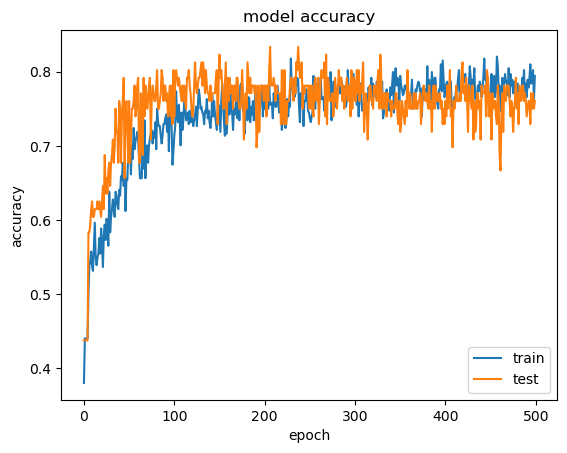

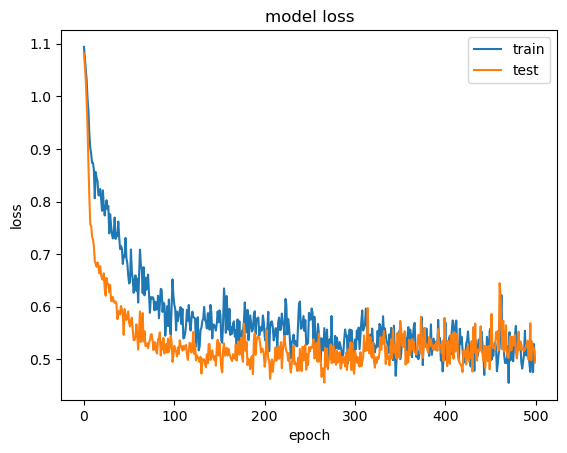

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step
 
confusion matrix for validation :
[[23  0  5]
 [ 0 25  1]
 [ 9  1 32]]
confusion matrix for train :
[[ 85   0  29]
 [  0  93   8]
 [ 26  16 127]]
 
              precision    recall  f1-score   support

           0      0.719     0.821     0.767        28
           1      0.962     0.962     0.962        26
           2      0.842     0.762     0.800        42

    accuracy                          0.833        96
   macro avg      0.841     0.848     0.843        96
weighted avg      0.838     0.833     0.834        96



In [19]:
#5 layer simple = B1

#create callback
filepath = 'my_best_model.keras'
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=0,
                             save_best_only=True,
                             mode='max')
callbacks = [checkpoint]

tf.random.set_seed(2)

model = keras.models.Sequential([
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.01)
#optimizer = keras.optimizers.SGD(learning_rate=0.5)
#optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# training
batch_size = 64
epochs = 500

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks=callbacks, shuffle=True, verbose=2)

graph(history)

#Load and evaluate the best model version
model = load_model(filepath) #to load the best model using call backs
y_pred = np.argmax( model.predict(X_val) , axis=1)
y_true = y_val
y_pred_t = np.argmax( model.predict(X_train) , axis=1)
y_true_t = y_train
print_everything(y_true, y_pred, y_true_t, y_pred_t)

# SVM Classifier
#### Author: Talha Adnan

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
import resource
import threading
import psutil

In [21]:
# Initialize SVM classifier
svm = SVC(kernel='linear', C=1.0)

# Train the classifier
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
# Predict the labels of test data
y_pred = svm.predict(X_val)

In [23]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

In [24]:
print("Accuracy:", accuracy)

Accuracy: 0.5729166666666666


##### Figuring out what is the best kernel using KFold cross validation, without hyperparameter tuning.

Implementing a learn_classifier function for variability of kernel.

In [25]:
def learn_classifier(X_train, y_train, kernel):
    """
    This function learns the classifier from the input features and labels using the 
    kernel function supplied
    Inputs:
        X_train
        y_train
        kernel
    Outputs:
        classifier learned from data
    """

    clf = SVC(kernel=kernel)

    clf.fit(X_train, y_train)

    return clf

In [26]:
clf = learn_classifier(X_train, y_train, 'rbf')
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.5625

Implementing a function to evaluate the performace of the classifier

In [31]:
def evaluate_classifier(clf, X_validation, y_validation):
    """
    Evaluates the classifier based on the supplied validation data.
    Inputs:
        clf: classifier to evaluate
        X_validation: feature matrix
        y_validation: class labels
    Outputs:
        double: accuracy of classifier on validation data
    """
    y_pred = clf.predict(X_validation)
    
    accuracy = accuracy_score(y_validation, y_pred)
    
    return accuracy

In [32]:
accuracy = evaluate_classifier(clf, X_train, y_train)


Doing KFold cross validation:

In [33]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)
kf

KFold(n_splits=5, random_state=1, shuffle=True)

In [34]:
def best_model_selection(kf, X, y):
    """
    This function selects the kernel giving the best results using 
    k-fold cross-validation
    Input:
        kf: object defined above
        X: training data
        y: training labels
    Return:
        best_kernel (string)
    """

    kernel_accuracy = {}

    for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
        accuracies = []
        
        for train_index, test_index in kf.split(X):
            
            # Splitting data into training and testing sets for the 
            # current fold.
            X_train, y_train= X[train_index], y[train_index]
            X_test, y_test = X[test_index], y[test_index]
            classifier = learn_classifier(X_train, y_train, kernel)
            accuracy = evaluate_classifier(classifier, X_test, y_test)

            # Appending the accuracy/error to the error array for 
            # further evaluation of mean error.
            accuracies.append(accuracy)

        # Calculating the average accuracy for the current kernel 
        # across all folds
        kernel_accuracy[kernel] = np.mean(accuracies)
    
    # Getting the best kernel with the highest average accuracy.
    best_kernel = max(kernel_accuracy, key=kernel_accuracy.get)

    # Returning the best kernel as a string.
    return best_kernel


best_kernel = best_model_selection(kf, X_train, y_train)
print(f"The best model after KFold cross-validation is {best_kernel}")


The best model after KFold cross-validation is rbf


The best model being selected is rbf is probably due to the decision boundary between the classes is nonlinear and complex.
The flexibility in forming localized and smooth decision regions around data points allows RBF to adapt well to complex patterns.
Since this is without the tuning of any hyper-parameters I can not say much.

#### Model selection with hyper-parameter tuning

Standardization of features means substracting the mean and scales features to unit variance. Why is that important? Before you fit an SVM you need to make it so that each feature contributes equally to the decision surface. Thereby ensuring that you do not distort the geometric properties of the features on different scales.
Also it takes you a lot of time to train if you do not standardize your features.

In [35]:
# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Setting up the grid search parameters
param_grid = {
    # C (Regualization parameter): Controls the trade-off between achieving a low
    # error on training data minimizing the model complexity for better generalization
    # Cross-validation is used to find optimal value find optimal value
    'C': [0.1, 1, 10, 100], 

    # Controls the influence of individual training samples on the decision boundary.
    # Cross validation is used to tune this parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10],

    # SVM kernels to test from.
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [37]:
# Dictionary to store results from the thread
results = {}

Here I am using a function to train the model on a separate thread as there fore I can specifially isolate the process
on the thread and then get an accurage aggregate of the resources used for the training of the model. 

In [42]:
# Function to train the model on a separate thread and store results
def train_model(X_train, y_train, grid_params, result_dict):
    """
    This function trains the model on a sparate thread and also logs the resources
    used to train it.
    Inputs:
        X_train: feature matrix for training
        y_train: class labels
        grid_params: hyper-parameters to try for tuning of the model
        result_dict: stores the results of the model.
    """
    
    # Start resource monitoring
    usage_start = resource.getrusage(resource.RUSAGE_SELF)

    # Using GridSearchCV is used as it is a powerful tool as it
    # helps in systematically working through multiple combinations
    # parameter turns, cross-validating as it goes to determine
    # which tune gives the best performance.
    # After testing all combinations GridSearchCV selects the 
    # parameters that yeild teh best average performace results
    # during the cross-validation.
    grid = GridSearchCV(SVC(), grid_params, refit=True, verbose=2, cv=5)
    grid.fit(X_train, y_train)

    # End resource monitoring
    usage_end = resource.getrusage(resource.RUSAGE_SELF)

    # Calculate and print the resources used
    cpu_time_used = usage_end.ru_utime - usage_start.ru_utime
    memory_used = usage_end.ru_maxrss - usage_start.ru_maxrss  # This is in kilobytes

    # Store results in the dictionary
    result_dict['best_params'] = grid.best_params_
    result_dict['best_score'] = grid.best_score_
    result_dict['classifier'] = grid.best_estimator_
    result_dict['cpu_time'] = cpu_time_used
    result_dict['memory'] = memory_used / 1024  # Convert to MB

In [43]:
# Start the training thread
training_thread = threading.Thread(target=train_model, args=(X_train, y_train, param_grid, results))
training_thread.start()
training_thread.join()  # Wait for the training to finish

# Output results
print("Best Parameters:", results['best_params'])
print("Best Cross-Validation Score:", results['best_score'])
print("CPU Time Used:", results['cpu_time'], "seconds")
print("Memory Used:", results['memory'], "MB")

# Evaluate the model
classifier = results['classifier']
y_pred = classifier.predict(X_val)
print("Accuracy on validation set:", accuracy_score(y_val, y_pred))
print("Classification Report on validation set:")
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

Plotting the learning curve

In [40]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color="r", alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, color="g", alpha=0.1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

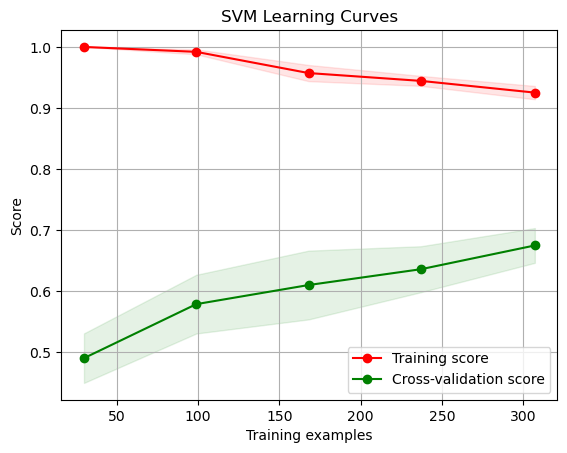

In [41]:
plot_learning_curve(classifier, "SVM Learning Curves", X_train, y_train, cv=5)
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict the labels of test data
y_pred = knn.predict(X_val)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.5416666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.29      0.33        28
           1       0.73      0.73      0.73        26
           2       0.50      0.60      0.54        42

    accuracy                           0.54        96
   macro avg       0.54      0.54      0.54        96
weighted avg       0.53      0.54      0.53        96

